# import requests, from bs4 import BeautifulSoup을 이용하여 일부만

In [ ]:
import requests
from bs4 import BeautifulSoup
res = requests.get('https://dor.gwnu.ac.kr/dor/5302/subview.do')
res

<Response [200]>

In [ ]:
res.text

'\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n    \r\n\t\r\n\t\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n \r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n<!DOCTYPE HTML>\n<!--[if lt IE 7 ]><html dir="ltr" lang="ko" class="no-js ie ie6 lte7 lte8 lte9"><![endif]-->\n<!--[if IE 7 ]><html dir="ltr" lang="ko" class="no-js ie ie7 lte7 lte8 lte9"><![endif]-->\n<!--[if IE 8 ]><html dir="ltr" lang="ko" class="no-js ie ie8 lte8 lte9"><![endif]-->\n<!--[if IE 9 ]><html dir="ltr" lang="ko" class="no-js ie ie9 lte9"><![endif]-->\n<!--[if (gt IE 9)|!(IE)]><!-->\n<html dir="ltr" lang="ko" class="no-js">\n  <!--<![endif]-->\n  <head>\n\t<meta charset="UTF-8">\n\t<title>오늘의메뉴</title>\n\t<!-- Custom -->\n\t<link rel="stylesheet" href="/sites/templetstyleguide/style/css/w_reset.css?version=1">\n\t<link rel="stylesheet" href="/sites/templetstyleguide/style/css/w_layout_templet.css?version=1">\n\t<link rel="stylesheet" href="/sites/temple

In [ ]:
soup = BeautifulSoup(res.text, "html.parser")
soup


<!DOCTYPE HTML>

<!--[if lt IE 7 ]><html dir="ltr" lang="ko" class="no-js ie ie6 lte7 lte8 lte9"><![endif]-->
<!--[if IE 7 ]><html dir="ltr" lang="ko" class="no-js ie ie7 lte7 lte8 lte9"><![endif]-->
<!--[if IE 8 ]><html dir="ltr" lang="ko" class="no-js ie ie8 lte8 lte9"><![endif]-->
<!--[if IE 9 ]><html dir="ltr" lang="ko" class="no-js ie ie9 lte9"><![endif]-->
<!--[if (gt IE 9)|!(IE)]><!-->
<html class="no-js" dir="ltr" lang="ko">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<title>오늘의메뉴</title>
<!-- Custom -->
<link href="/sites/templetstyleguide/style/css/w_reset.css?version=1" rel="stylesheet"/>
<link href="/sites/templetstyleguide/style/css/w_layout_templet.css?version=1" rel="stylesheet"/>
<link href="/sites/templetstyleguide/style/css/w_guide.css?version=1" rel="stylesheet"/>
<link href="/sites/dor/style/css/w_sub.css?version=1" rel="stylesheet"/>
<link href="/sites/templetstyleguide/style/css/w_common.css?version=1" rel="stylesheet"/>
<link href="/sites/templetstyleguide/s

In [ ]:
# 오늘의 메뉴 테이블을 찾음
table = soup.find('table')

# 테이블의 내용을 순회하며 추출
menu_data = []
current_date = None

for row in table.find_all('tr')[1:]:  # 첫 번째 행은 헤더이므로 제외
    if row.find('th'):
        current_date = row.find('th').get_text(strip=True)
    columns = row.find_all('td')
    if len(columns) == 2:  # 중식이나 석식만 있는 경우
        meal_type = columns[0].get_text(strip=True)
        menu = columns[1].get_text(strip=True)
        menu_data.append([current_date, meal_type, menu])

# 추출된 메뉴 데이터를 출력
for item in menu_data:
    print(f"날짜: {item[0]}, 식사 타입: {item[1]}, 메뉴: {item[2]}")


날짜: 2024.06.10( 월 ), 식사 타입: 중식, 메뉴: 한우사골설렁탕,깍두기, 단오크림찰떡, 음료후식, 밥
날짜: 2024.06.10( 월 ), 식사 타입: 석식, 메뉴: 돈등뼈감자탕,쭈꾸미숙회무침,명란바삭김, 꽈리고추양념찜, 잡곡밥,포기김치
날짜: 2024.06.11( 화 ), 식사 타입: 중식, 메뉴: 돈가스(포크커틀릿), 브로콜리스프, 방울토마토, 채소샐러드, 단무지,오이피클, 밥
날짜: 2024.06.11( 화 ), 식사 타입: 석식, 메뉴: 쇠고기무국,가자미조림,쫄면무침, 초록채소반찬, 잡곡밥,포기김치
날짜: 2024.06.12( 수 ), 식사 타입: 중식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.12( 수 ), 식사 타입: 석식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.13( 목 ), 식사 타입: 중식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.13( 목 ), 식사 타입: 석식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.14( 금 ), 식사 타입: 중식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.14( 금 ), 식사 타입: 석식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.15( 토 ), 식사 타입: 중식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.15( 토 ), 식사 타입: 석식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.16( 일 ), 식사 타입: 중식, 메뉴: 등록된 식단내용이(가) 없습니다.
날짜: 2024.06.16( 일 ), 식사 타입: 석식, 메뉴: 등록된 식단내용이(가) 없습니다.


# 셀레니움

In [1]:
!pip install selenium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 29.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00


In [2]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from bs4 import BeautifulSoup
import time

# 크롬 옵션 설정
chrome_options = Options()
chrome_options.add_argument("--headless")  # 헤드리스 모드
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# 크롬 드라이버 실행 (경로 생략)
driver = webdriver.Chrome(options=chrome_options)

# 크롬 드라이버 사용 코드 작성
driver.get("https://dor.gwnu.ac.kr/dor/5302/subview.do")
print(driver.title)
menu_data = []

# 페이지 로드 대기
wait = WebDriverWait(driver, 10)

for _ in range(16):  # 필요한 주 만큼 반복
    # HTML 소스를 가져와서 파싱
    soup = BeautifulSoup(driver.page_source, 'html.parser')

    # 오늘의 메뉴 테이블을 찾음
    table = soup.find('table')

    # 테이블의 내용을 순회하며 추출
    current_date = None
    for row in table.find_all('tr')[1:]:  # 첫 번째 행은 헤더이므로 제외
        if row.find('th'):
            current_date = row.find('th').get_text(strip=True)
        columns = row.find_all('td')
        if len(columns) == 2:  # 중식이나 석식만 있는 경우
            meal_type = columns[0].get_text(strip=True)
            menu = columns[1].get_text(strip=True)
            menu_data.append([current_date, meal_type, menu])

    # 이전 주로 이동
    prev_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, 'input._termLeft')))
    prev_button.click()

    # 페이지 로드 대기
    time.sleep(2)  # 필요에 따라 조정

# 브라우저 닫기
driver.quit()

# 추출된 메뉴 데이터를 출력
for item in menu_data:
    print(f"날짜: {item[0]}, 식사 타입: {item[1]}, 메뉴: {item[2]}")

오늘의메뉴
날짜: 2024.06.10( 월 ), 식사 타입: 중식, 메뉴: 한우사골설렁탕,깍두기, 단오크림찰떡, 음료후식, 밥
날짜: 2024.06.10( 월 ), 식사 타입: 석식, 메뉴: 돈등뼈감자탕,쭈꾸미숙회무침,명란바삭김, 꽈리고추양념찜, 잡곡밥,포기김치
날짜: 2024.06.11( 화 ), 식사 타입: 중식, 메뉴: 돈가스(포크커틀릿), 브로콜리스프, 방울토마토, 채소샐러드, 단무지,오이피클, 밥
날짜: 2024.06.11( 화 ), 식사 타입: 석식, 메뉴: 쇠고기무국,가자미조림,쫄면무침, 초록채소반찬, 잡곡밥,포기김치
날짜: 2024.06.12( 수 ), 식사 타입: 중식, 메뉴: 반계탕, 찰현미죽, 깍두기, 바나나
날짜: 2024.06.12( 수 ), 식사 타입: 석식, 메뉴: 낙지무쑥갓국, 광장시장고기완자전, 감자크로켓(케찹),시금치나물,잡곡밥,포기김치
날짜: 2024.06.13( 목 ), 식사 타입: 중식, 메뉴: 장칼국수, 애플파이, 칼슘두유, 포기김치
날짜: 2024.06.13( 목 ), 식사 타입: 석식, 메뉴: 오이미역냉국, 치킨꿔바로우탕수육, 두부조림, 아삭고추무침, 잡곡밥,포기김치
날짜: 2024.06.14( 금 ), 식사 타입: 중식, 메뉴: 쇠고기미역국, 자반고등어카레구이, 알리오올리오스파게티, 과일샐러드, 잡곡밥,포기김치
날짜: 2024.06.14( 금 ), 식사 타입: 석식, 메뉴: 북어콩나물국, 돈육마라매콤불고기, 순대채소볶음, 초록채소반찬, 잡곡밥,포기김치
날짜: 2024.06.15( 토 ), 식사 타입: 중식, 메뉴: 참치김치볶음덮밥, 유부방울파국,음료후식, 스크램블드에그, 포기김치
날짜: 2024.06.15( 토 ), 식사 타입: 석식, 메뉴: 두부버섯된장국, 대패삼겹살 파채구이, 오징어숙회무침, 알마늘지무침, 잡곡밥,포기김치
날짜: 2024.06.16( 일 ), 식사 타입: 중식, 메뉴: 감자수제비국, 베이컨청경채볶음, 명태살두부전, 초록채소반찬, 잡곡밥,포기김치
날짜: 2024.06.16( 일 ), 식사 타입: 석

In [3]:
import pandas as pd
# 데이터프레임 생성
df = pd.DataFrame(menu_data, columns=["날짜", "식사 타입", "메뉴"])
# print(df)
# 날짜별로 오름차순 정렬
df['날짜'] = pd.to_datetime(df['날짜'].str.split('(').str[0], format='%Y.%m.%d')
df = df.sort_values(by='날짜')
#print(df)
# 날짜 형식을 원래 형식으로 변환
df['날짜'] = df['날짜'].dt.strftime('%Y.%m.%d(%a)')
# print(df)

In [4]:
# CSV 파일로 저장
file_path = 'menu_data.csv'
df.to_csv(file_path, index=False, encoding='utf-8-sig')

In [ ]:
# # CSV 파일로 저장
# file_path = 'menu_data.csv'
# df.to_csv(file_path, index=False, encoding='utf-8-sig')
# #import ace_tools as tools; tools.display_dataframe_to_user(name="Sorted Menu Data", dataframe=df)
# file_path

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 15.5 MB/s eta 0:00:00


In [ ]:
from konlpy.tag import Kkma

# 데이터 불러오기
menu_data = pd.read_csv('menu_data.csv')

# Kkma 형태소 분석기 초기화
kkma = Kkma()

# 메뉴에서 명사 추출 함수
def extract_nouns(text):
    if isinstance(text, str):
        return kkma.nouns(text)
    return []

# '메뉴' 열에 명사 추출 적용
menu_data['메뉴_명사'] = menu_data['메뉴'].apply(extract_nouns)

In [ ]:
# 명사로 분류된 메뉴 항목 출력
print(menu_data[['메뉴', '메뉴_명사']])


                                                메뉴  \
0                               등록된 식단내용이(가) 없습니다.   
1                               등록된 식단내용이(가) 없습니다.   
2                               등록된 식단내용이(가) 없습니다.   
3              북어콩나물국, 김치돈육볶음, 돌김자반, 시금치나물, 밥,포기김치   
4    쇠고기미역국, 오징어숙회무침, 감자오븐구이(케찹), 깻잎겉절이무침,잡곡밥,포기김치   
..                                             ...   
219                             등록된 식단내용이(가) 없습니다.   
220                             등록된 식단내용이(가) 없습니다.   
221                             등록된 식단내용이(가) 없습니다.   
222                             등록된 식단내용이(가) 없습니다.   
223                             등록된 식단내용이(가) 없습니다.   

                                                 메뉴_명사  
0                                   [등록, 식단, 식단내용, 내용]  
1                                   [등록, 식단, 식단내용, 내용]  
2                                   [등록, 식단, 식단내용, 내용]  
3    [북어, 북어콩나물국, 콩나물국, 김치, 김치돈육볶음, 돈육, 볶음, 돌, 돌김자반...  
4    [쇠고기, 쇠고기미역국, 미역국, 오징어, 오징어숙회무침, 숙회, 무침, 감자, 감...  
..       

In [ ]:
from collections import Counter

# 모든 명사 합치기
all_nouns = [noun for sublist in menu_data['메뉴_명사'] for noun in sublist]

# 빈도 계산
noun_counts = Counter(all_nouns)

# 빈도 상위 20개 명사 출력
print(noun_counts.most_common(20))

[('김치', 180), ('포기', 179), ('포기김치', 179), ('잡곡밥', 151), ('무침', 86), ('채소', 67), ('볶음', 66), ('구이', 55), ('조림', 42), ('국', 42), ('샐러드', 39), ('쇠고기', 35), ('장국', 31), ('나물', 29), ('어묵', 27), ('후식', 27), ('두부', 26), ('돈육', 25), ('양념', 25), ('불고기', 21)]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# 명사 리스트를 문자열로 변환
menu_data['메뉴_명사_str'] = menu_data['메뉴_명사'].apply(lambda x: ' '.join(x))

# CountVectorizer를 사용하여 DTM 생성
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(menu_data['메뉴_명사_str'])

# DTM을 데이터프레임으로 변환
dtm_df = pd.DataFrame(dtm.toarray(), columns=vectorizer.get_feature_names_out())

# 결과 출력
print(dtm_df)


     1가지  가루  가스  가슴살  가자미  가자미구이  가자미조림  가지  가지나물  가지나물무침  ...  후랑크쏘세지  \
0      0   0   0    0    0      0      0   0     0       0  ...       0   
1      0   0   0    0    0      0      0   0     0       0  ...       0   
2      0   0   0    0    0      0      0   0     0       0  ...       0   
3      0   0   0    0    0      0      0   0     0       0  ...       0   
4      0   0   0    0    0      0      0   0     0       0  ...       0   
..   ...  ..  ..  ...  ...    ...    ...  ..   ...     ...  ...     ...   
219    0   0   0    0    0      0      0   0     0       0  ...       0   
220    0   0   0    0    0      0      0   0     0       0  ...       0   
221    0   0   0    0    0      0      0   0     0       0  ...       0   
222    0   0   0    0    0      0      0   0     0       0  ...       0   
223    0   0   0    0    0      0      0   0     0       0  ...       0   

     후랑크쏘세지채소  후랑크채소볶음  후랑크핫  후룻  후식  후식음료  훈제  흑임자  흰쌀밥  
0           0        0     0   0   0    

In [ ]:
# 단어 빈도(TF) 계산
tf = dtm_df.sum(axis=0)

# 상위 20개 단어 출력
print(tf.sort_values(ascending=False).head(20))


김치      180
포기      179
포기김치    179
잡곡밥     151
무침       86
채소       67
볶음       66
구이       55
조림       42
샐러드      39
쇠고기      35
장국       31
나물       29
어묵       27
후식       27
두부       26
양념       25
돈육       25
불고기      21
오이       20
dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


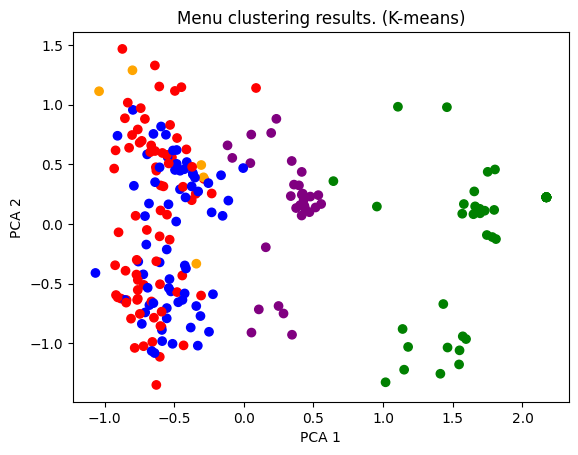

                                                  대표 메뉴      색상
클러스터                                                           
0     쇠고기미역국, 오징어숙회무침, 감자오븐구이(케찹), 깻잎겉절이무침,잡곡밥,포기김치,...     red
1     등록된 식단내용이(가) 없습니다., 등록된 식단내용이(가) 없습니다., 등록된 식단...   green
2     북어콩나물국, 김치돈육볶음, 돌김자반, 시금치나물, 밥,포기김치, 물만두국, 돈육간...    blue
3     잔치국수, 두유, 빵(치즈케이크), 포기김치,밥, 스팸마요덮밥, 팽이버서미역미소국,...  purple
4     부대찌개, 고등어자반구이, 알마늘지무침, 브로콜리숙회,잡곡밥,포기김치, 돈등뼈감자탕...  orange


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# K-means 클러스터링 적용
kmeans = KMeans(n_clusters=5, random_state=42)
menu_data['클러스터'] = kmeans.fit_predict(dtm)

# 클러스터 결과 시각화 (PCA를 사용하여 2D로 축소)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(dtm.toarray())
menu_data['pca_x'] = pca_result[:, 0]
menu_data['pca_y'] = pca_result[:, 1]

# 클러스터별 색상 매핑
colors = ['red', 'green', 'blue', 'purple', 'orange']
menu_data['color'] = menu_data['클러스터'].map(lambda x: colors[x])

plt.scatter(menu_data['pca_x'], menu_data['pca_y'], c=menu_data['color'])
plt.title('Menu clustering results. (K-means)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# 클러스터별 대표 메뉴 출력
cluster_representatives = menu_data.groupby('클러스터')['메뉴'].apply(lambda x: ', '.join(x[:5]))
#print(cluster_representatives)

# 클러스터별 대표 메뉴 출력 시 색상 포함하여 출력
cluster_representatives_with_color = menu_data.groupby('클러스터').apply(
    lambda x: pd.Series({
        '대표 메뉴': ', '.join(x['메뉴'].head(5)),
        '색상': colors[x.name]
    })
)
print(cluster_representatives_with_color)

# 연관 분석은 지금 하지 말자.

In [ ]:
# from mlxtend.preprocessing import TransactionEncoder
# from mlxtend.frequent_patterns import apriori, association_rules

# # 연관 분석을 위한 데이터 준비
# menu_lists = menu_data['메뉴_명사'].tolist()

# # TransactionEncoder를 사용하여 데이터 변환
# te = TransactionEncoder()
# te_ary = te.fit(menu_lists).transform(menu_lists)
# df = pd.DataFrame(te_ary, columns=te.columns_)

# # Apriori 알고리즘 적용
# frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)

# # 연관 규칙 도출
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# # 결과 출력
# print(rules)

     antecedents              consequents  antecedent support  \
0           (구이)                     (김치)            0.245536   
1           (김치)                     (구이)            0.803571   
2           (구이)                    (잡곡밥)            0.245536   
3          (잡곡밥)                     (구이)            0.674107   
4           (구이)                     (포기)            0.245536   
...          ...                      ...                 ...   
2603        (볶음)  (포기김치, 잡곡밥, 김치, 채소, 포기)            0.294643   
2604       (잡곡밥)   (포기김치, 볶음, 김치, 채소, 포기)            0.674107   
2605        (김치)  (포기김치, 볶음, 잡곡밥, 채소, 포기)            0.803571   
2606        (채소)  (포기김치, 볶음, 잡곡밥, 김치, 포기)            0.299107   
2607        (포기)  (포기김치, 볶음, 잡곡밥, 김치, 채소)            0.799107   

      consequent support   support  confidence      lift  leverage  \
0               0.803571  0.236607    0.963636  1.199192  0.039302   
1               0.245536  0.236607    0.294444  1.199192  0.039302   
2        